In [21]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

(364, 241) dimention of template(2)  

(153, 128) dimention of template(1)  

(100, 376) dimention of plate(2)  

(88, 451) dimention of plate(6)  

(38, 150) dimention of plate(8)  



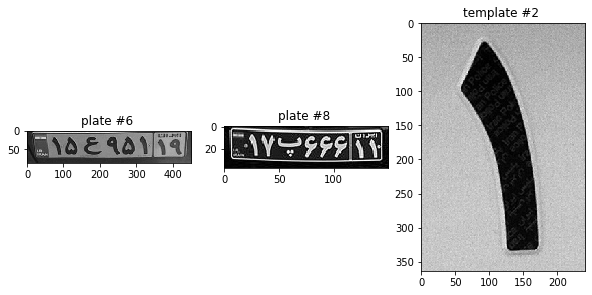

In [82]:

Templates=[]
labels=[]
Plates=[]

for i in range(10):
    path="HW_ayubamini/Templates/{}.jpg" .format(i)
    templt=cv2.imread(path , 0)
    Templates.append(templt)
    labels.append(int(i))
    
    
for i in range(9):
    path1="HW_ayubamini/Plates/Plate{}.jpg" .format(i+1)
    plate=cv2.imread(path1 , 0)
    Plates.append(plate)


plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(Plates[5] , cmap='gray')
plt.title("plate #6 ")
plt.subplot(1,3,2)
plt.imshow(Plates[7] , cmap='gray')
plt.title("plate #8 ")
plt.subplot(1,3,3)
plt.imshow(dic[1] , cmap='gray')
plt.title("template #2 ")


#some instance for dimention of temlplate and plate
print(dic[1].shape,"dimention of template(2)  \n")
print(dic[0].shape,"dimention of template(1)  \n")
 
print(Plates[1].shape ,"dimention of plate(2)  \n")
print(Plates[5].shape ,"dimention of plate(6)  \n")
print(Plates[7].shape ,"dimention of plate(8)  \n") 

In [83]:
Plates[6] = 255 - Plates[6]
Plates[7] = 255 - Plates[7]

In [89]:
def sliding_templts_on_plate (plte, templates):
    H, W = plte.shape
    best_matching = []
    best_location= []
    charecter = 1

    for THs in [.85,.8,.75,.70,.67,.65]:
        counter = -1 
        for tplt in templates:
            counter+=1 
            for scale in  [1,0.85,.75,.65,.55,.40]:
                new_dim = (int(scale*tplt.shape[1]/(tplt.shape[0] / H)),int(scale*tplt.shape[0]/(tplt.shape[0] / H)))
                new_tmplte = cv2.resize(tplt,new_dim)
                plte = cv2.threshold(plte, 100, 255, cv2.THRESH_BINARY)[1]
                new_tmplte = cv2.threshold(new_tmplte, 100, 255, cv2.THRESH_BINARY)[1]
                h,w = new_tmplte.shape
                while(True):
                    res = cv2.matchTemplate(plte, new_tmplte, cv2.TM_CCOEFF_NORMED)
                    _,max_val,_,max_loc = cv2.minMaxLoc(res)
                    if (max_val > THs):
                        plte[:,max_loc[0]:max_loc[0]+w] = 255
                        charecter+=1
                        best_matching.append(counter)
                        best_location.append(max_loc[0])
                    else: break
                if charecter > 7:
                    return best_matching,best_location

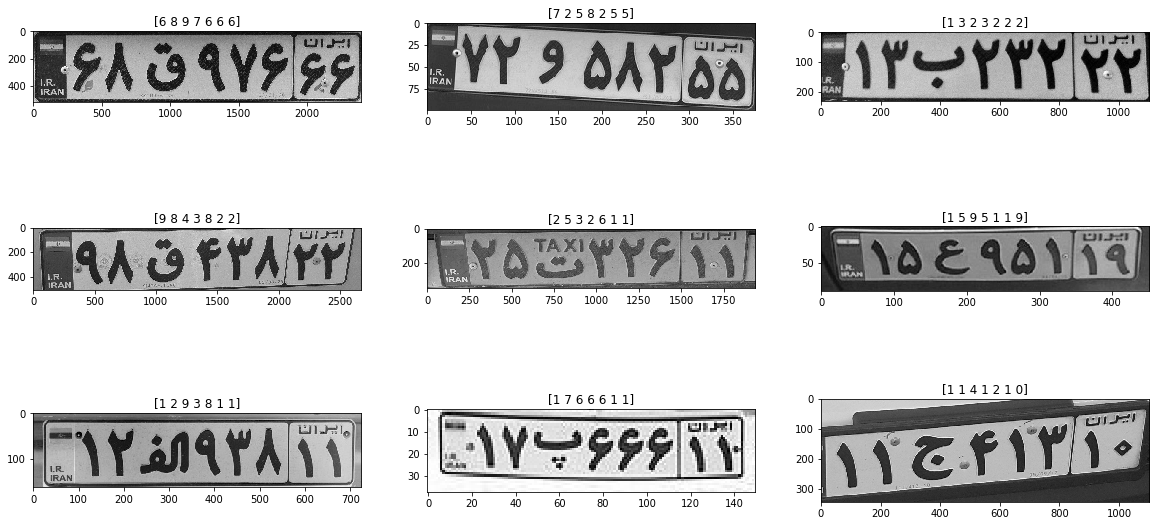

In [91]:
all_best_matching = []
all_best_location = []
for plate in Plates:
    best_matching,best_location  = sliding_templts_on_plate(plate,Templates)
    all_best_matching.append(best_matching)
    all_best_location .append(best_location)
    

plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Plates[i],cmap='gray')
    plt.title(np.array(all_best_matching [i])[np.argsort(all_best_location[i])])
  